# Graph algorithms and Complexity Theory

In [1]:
from flow import MaximalFlow

### Vertices
Vertices can be defined as a dict with labels as keys and coordinate arrays as values. Alternatively, vertices can be defined as a nested array where each list is the next column of vertices. The two examples below generate identical graphs.

In [2]:
# Explicitly specifying coordinates
vertices = {'s':[0, 0],
            'a':[1, 2],
            'e':[1, 0.6667],
            'i':[1, -0.6667],
            'm':[1, -2],
            'b':[2, 2],
            'f':[2, 0.6667],
            'j':[2, -0.6667],
            'n':[2, -2],
            'c':[3, 2],
            'g':[3, 0.6667],
            'k':[3, -0.6667],
            'o':[3, -2],
            'd':[4, 2],
            'h':[4, 0.6667],
            'l':[4, -0.6667],
            'p':[4, -2],
            't':[5, 0]
           }

# Implicit coordinate assignment
vertices = [['s'],
            ['a', 'e', 'i', 'm'],
            ['b', 'f', 'j', 'n'],
            ['c', 'g', 'k', 'o'],
            ['d', 'h', 'l', 'p'],
            ['t']]

### Edges
Edges can also be defined with a dict where the key is a tuple specifying the vertices of the directed edge as seen below. Alternatively, a list of tuples can be provided.

In [3]:
capacity = {('s', 'a'):9,
            ('s', 'e'):8,
            ('s', 'i'):7,
            ('s', 'm'):3,
            ('a', 'b'):2,
            ('a', 'n'):6,
            ('e', 'f'):6,
            ('i', 'f'):2,
            ('i', 'j'):2,
            ('m', 'j'):2,
            ('m', 'n'):4,
            ('b', 'c'):6,
            ('b', 'e'):4,
            ('b', 'g'):3,
            ('f', 'c'):6,
            ('f', 'g'):1,
            ('f', 'k'):3,
            ('j', 'g'):4,
            ('j', 'k'):5,
            ('j', 'o'):6,
            ('n', 'k'):1,
            ('n', 'o'):3,
            ('c', 'd'):2,
            ('c', 'h'):4,
            ('g', 'h'):6,
            ('g', 'l'):8,
            ('k', 'l'):1,
            ('k', 'p'):1,
            ('o', 'd'):6,
            ('o', 'p'):4,
            ('d', 't'):7,
            ('h', 't'):2,
            ('l', 't'):7,
            ('p', 't'):6,}

## Finding maximum flow
### And related information

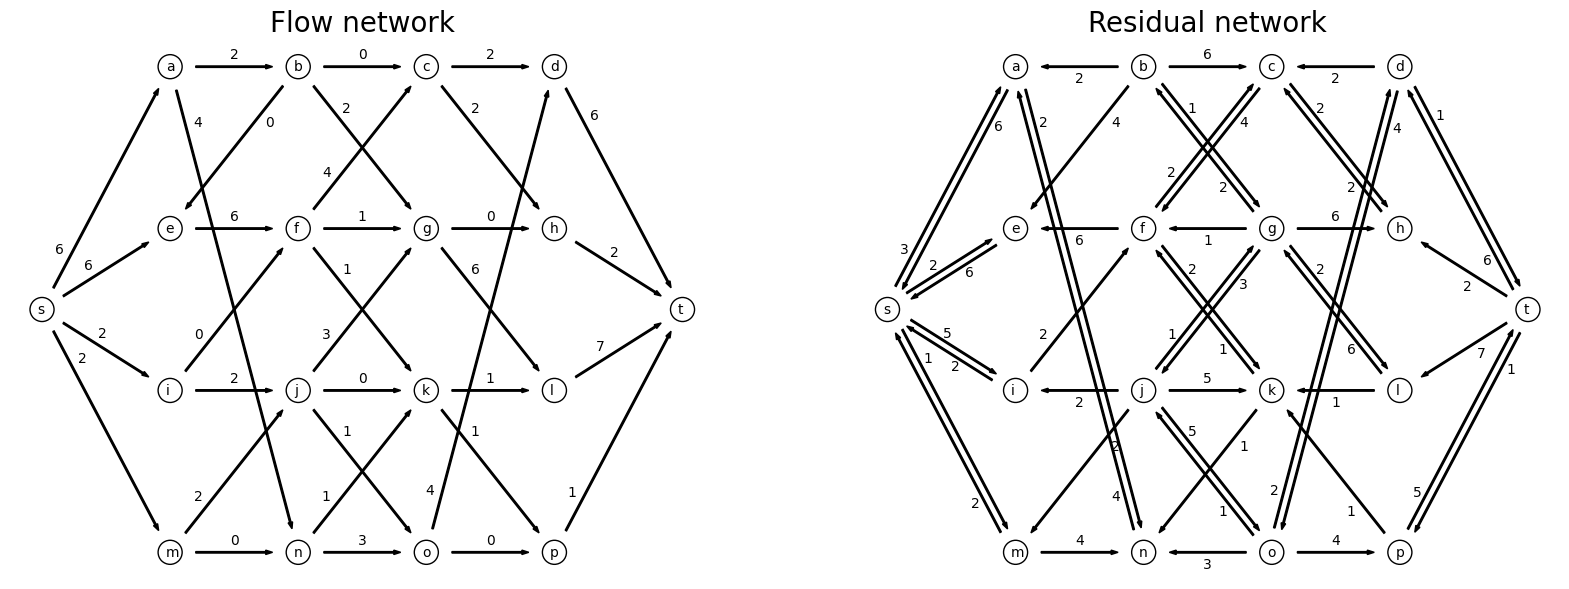

The maximum flow is 16
The minimum cut value is 16

The minimum cut seperates vertices into:
	A = {'m', 'f', 'k', 'e', 'i', 'h', 'n', 's', 'c', 'a'}
	B = {'o', 'l', 'j', 't', 'b', 'd', 'g', 'p'}

The edges across minimum cut are:
	m->j
	f->g
	k->l
	k->p
	i->j
	h->t
	n->o
	c->d
	a->b


In [4]:
mf = MaximalFlow(vertices, capacity)
mf.find_maximal_flow()
print(f"The maximum flow is {mf.get_flow()}")
print(f"The minimum cut value is {mf.get_minimal_cut_value()}\n")
A, B = mf.get_minimal_cut()
print(f"The minimum cut seperates vertices into:\n\tA = {A}\n\tB = {B}\n")
print("The edges across minimum cut are:")
for a, b in mf.get_edges_across_cut():
    print(f"\t{a}->{b}")